Context:
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

About this file:
This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("bankmarketing.csv")

In [3]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2309,25,services,single,tertiary,no,12,no,no,cellular,12,jun,126,6,-1,0,unknown,yes
2756,66,housemaid,married,primary,no,40,no,no,telephone,14,oct,290,2,-1,0,unknown,yes
1947,50,technician,divorced,secondary,no,-54,yes,yes,cellular,13,may,698,2,292,1,failure,yes
5043,43,management,married,tertiary,no,2987,no,no,cellular,4,jun,156,1,85,3,failure,yes
687,34,services,married,secondary,no,2956,no,no,cellular,6,aug,835,2,-1,0,unknown,yes


In [4]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


C:\Users\sudes\AppData\Local\Temp/ipykernel_4988/4094823358.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.distplot(df.skew())


<AxesSubplot:ylabel='Density'>

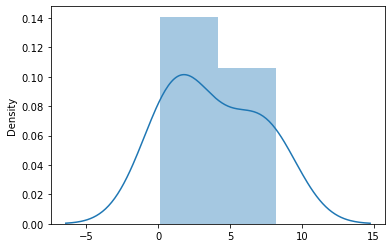

In [7]:
sns.distplot(df.skew())

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [12]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [14]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [23]:
df['balance'].max()

81204

In [25]:
np.where(df['balance'] == df['balance'].max())

(array([3043, 3380], dtype=int64),)

In [26]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<AxesSubplot:>

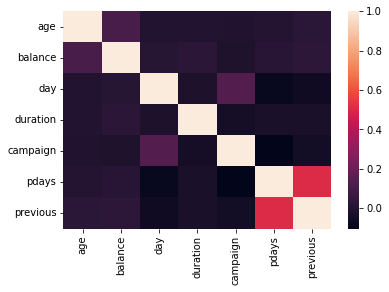

In [27]:
sns.heatmap(df.corr())

In [32]:
data = df.groupby("job")['age','marital','education','balance','deposit'].max().reset_index()
data = data.sort_values("balance", ascending = True)
data = data[['job', 'age', 'marital', 'education', 'balance','deposit']]
data = data.reset_index(drop=True)
data

C:\Users\sudes\AppData\Local\Temp/ipykernel_4988/371572560.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby("job")['age','marital','education','balance','deposit'].max().reset_index()


,job,age,marital,education,balance,deposit
0,unemployed,65,single,unknown,16397,yes
1,unknown,78,single,unknown,19268,yes
2,services,69,single,unknown,23592,yes
3,student,47,single,unknown,23878,yes
4,housemaid,82,single,unknown,26965,yes
5,management,78,single,unknown,36252,yes
6,technician,71,single,unknown,45248,yes
7,entrepreneur,84,single,unknown,51439,yes
8,self-employed,76,single,unknown,52587,yes
9,admin.,72,single,unknown,56831,yes


In [34]:
data = df.groupby("job")['age','marital','education','balance','deposit'].min().reset_index()
data = data.sort_values("balance", ascending = True)
data = data[['job', 'age', 'marital', 'education', 'balance','deposit']]
data = data.reset_index(drop=True)
data

C:\Users\sudes\AppData\Local\Temp/ipykernel_4988/2436023118.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby("job")['age','marital','education','balance','deposit'].min().reset_index()


,job,age,marital,education,balance,deposit
0,management,21,divorced,primary,-6847,no
1,self-employed,22,divorced,primary,-3058,no
2,entrepreneur,21,divorced,primary,-1965,no
3,technician,21,divorced,primary,-1944,no
4,housemaid,22,divorced,primary,-1531,no
5,blue-collar,20,divorced,primary,-1489,no
6,admin.,20,divorced,primary,-1415,no
7,retired,34,divorced,primary,-1206,no
8,services,21,divorced,primary,-1139,no
9,unemployed,21,divorced,primary,-825,no


In [35]:
df.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
10931,58,admin.,married,primary,no,879,yes,no,unknown,16,may,242,7,-1,0,unknown,no


In [40]:
del df['job'] 

In [43]:
del df['poutcome'] 

In [77]:
le = LabelEncoder()
list = ['marital', 'education','housing','contact','month', 'default','deposit','loan']
for val in list: 
    df[val] = le.fit_transform(df[val].astype(str))

In [78]:
df.corr()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
age,1.000000,-0.442782,-0.126018,-0.011425,0.112300,-0.168700,-0.031418,0.027762,-0.000762,0.006011,0.000189,-0.005278,0.002774,0.020169,0.034901
marital,-0.442782,1.000000,0.125845,-0.014691,-0.002138,-0.036345,-0.062029,-0.060456,-0.003642,0.020872,0.006781,-0.030794,0.031200,0.031281,0.067610
education,-0.126018,0.125845,1.000000,-0.010709,0.051728,-0.109168,-0.073154,-0.132540,0.016759,-0.011479,-0.019122,-0.005327,0.025165,0.022427,0.095948
default,-0.011425,-0.014691,-0.010709,1.000000,-0.060954,0.011076,0.076434,0.035709,0.017342,-0.023490,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.002138,0.051728,-0.060954,1.000000,-0.077092,-0.084589,-0.027295,0.010467,0.027575,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,-0.036345,-0.109168,0.011076,-0.077092,1.000000,0.076761,0.226392,-0.014770,0.096968,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,-0.062029,-0.073154,0.076434,-0.084589,0.076761,1.000000,0.006829,0.017269,-0.013280,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
contact,0.027762,-0.060456,-0.132540,0.035709,-0.027295,0.226392,0.006829,1.000000,0.007943,0.112536,-0.018000,0.059258,-0.227785,-0.169919,-0.249847
day,-0.000762,-0.003642,0.016759,0.017342,0.010467,-0.014770,0.017269,0.007943,1.000000,-0.201818,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
month,0.006011,0.020872,-0.011479,-0.023490,0.027575,0.096968,-0.013280,0.112536,-0.201818,1.000000,-0.024512,-0.117292,0.097611,0.093086,0.045425


In [79]:
df.sample(1)

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
1904,37,2,0,0,912,1,0,0,12,6,637,3,328,22,1


In [80]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [81]:
pca = PCA(n_components = 10)
x = pca.fit_transform(x)

In [82]:
x

array([[ 8.16071912e+02,  6.68496995e+02, -4.62908674e+01, ...,
        -4.31034249e-01,  1.28711338e+00,  7.08216969e-01],
       [-1.48088365e+03,  1.09907628e+03, -4.07839509e+01, ...,
        -3.47870628e-01,  1.04072666e+00,  7.03118849e-01],
       [-2.56084404e+02,  1.01809609e+03, -4.22866426e+01, ...,
        -3.38827634e-01,  1.39875038e+00,  5.97687776e-01],
       ...,
       [-1.50009588e+03, -2.11822903e+02, -5.35299129e+01, ...,
         7.54483038e-03, -3.34156662e-01, -4.91258585e-01],
       [-1.52934876e+03, -3.60413609e+02,  1.18180468e+02, ...,
         2.80515637e+00, -1.14122731e-01, -4.36475260e-01],
       [-1.52794214e+03,  2.60228462e+02, -4.88867878e+01, ...,
        -9.02108762e-02, -3.04219680e-01, -5.40964181e-01]])

In [83]:
trainx, testx, trainy, testy = train_test_split(x,y,test_size=25, random_state = 25)

In [84]:
trainx.shape

(11137, 10)

In [85]:
testx.shape

(25, 10)

In [86]:
trainy.shape

(11137,)

In [87]:
testy.shape

(25,)

In [88]:
trainx

array([[-5.66443240e+02, -3.55099643e+02, -5.55455498e+01, ...,
        -2.13579709e-01, -4.01535767e-01, -6.73660026e-01],
       [-1.52928590e+03, -2.91755246e+02, -5.43486799e+01, ...,
        -2.76581241e-01,  1.19256804e+00,  4.71173337e-01],
       [ 2.26384837e+03,  1.25209821e+02,  1.31529610e+02, ...,
        -3.18713598e-01, -2.28587599e-01, -5.45555958e-01],
       ...,
       [ 6.97761781e+02, -2.75180601e+02, -5.54522794e+01, ...,
        -2.85988091e-01,  4.71285104e-02, -1.36753308e+00],
       [-1.23483700e+03, -1.31430158e+02,  4.61625235e+01, ...,
         3.66437789e+00,  8.48993584e-02, -4.64859174e-01],
       [-4.41087370e+02, -2.96740195e+02,  2.91086641e+02, ...,
        -2.00933837e+00,  2.43040138e-01, -3.63889252e-01]])

In [89]:
dt = DecisionTreeClassifier()
dt.fit(trainx,trainy)

DecisionTreeClassifier()

In [91]:
dtpr = dt.predict(testx)

In [92]:
accuracy_score(testy, dtpr)

0.8

In [93]:
print(classification_report(testy, dtpr))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.86      0.80      0.83        15

    accuracy                           0.80        25
   macro avg       0.79      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



In [94]:
svc = SVC()
svc.fit(trainx, trainy)

SVC()

In [98]:
svc.predict(testx)
accuracy_score(testy, svc.predict(testx))

0.72

In [99]:
rf = RandomForestClassifier()
rf.fit(trainx, trainy)

RandomForestClassifier()

In [100]:
rf.predict(testx)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1])

In [101]:
accuracy_score(testy, rf.predict(testx))

0.92

In [102]:
ad = AdaBoostClassifier()
ad.fit(trainx, trainy)

AdaBoostClassifier()

In [103]:
ad.predict(testx)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1])

In [104]:
accuracy_score(testy, ad.predict(testx))

0.84

In [109]:
estimators = []
estimators.append(('kn', KNeighborsClassifier()))
estimators.append(('dt', DecisionTreeClassifier()))
vot_hard = VotingClassifier(estimators)

In [110]:
vot_hard.fit(trainx, trainy)

VotingClassifier(estimators=[('kn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [111]:
vot_hard.predict(testx)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0])

In [112]:
accuracy_score(testy, vot_hard.predict(testx))

0.72

In [113]:
print(classification_report(testy, vot_hard.predict(testx)))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.90      0.60      0.72        15

    accuracy                           0.72        25
   macro avg       0.75      0.75      0.72        25
weighted avg       0.78      0.72      0.72        25



In [114]:
print(confusion_matrix(testy, vot_hard.predict(testx)))

[[9 1]
 [6 9]]
